# TITANIC SURVIVAL PREDICTION

In [55]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load data
td = pd.read_csv("C:/Users/yuvak/OneDrive/Pictures/Titanic dataset/tested.csv")

#Exploratory data analysis

In [3]:
len(td)

418

In [4]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#Explaning the dataset

survival: No='0', Yes='1'

pclass: Ticket class 1=1st, 2=2nd, 3=3rd

sex: gender(male and female)

Age: Age in numbers

SibSp: Number of siblings/spouses

parch: parents and children

Ticket, fare, cabin

Embarked: Port of embarkation C=cherbourg, Q=Queenstown, S=Southampton

In [5]:
td.index

RangeIndex(start=0, stop=418, step=1)

In [6]:
td.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Analysis

In [8]:
td.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

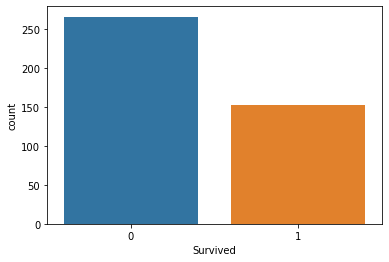

In [10]:
#countplot for survived and not-survived

sns.countplot(x='Survived', data=td) #visualisation

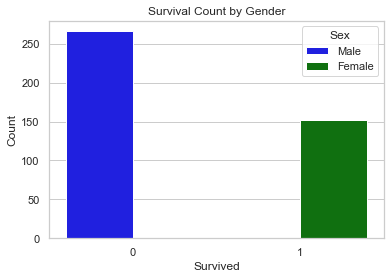

In [11]:
#male and female survived
custom_palette = ["blue", "green"]

sns.set(style="whitegrid")
sns.set_palette(custom_palette)

sns.countplot(x='Survived', data=td, hue='Sex')

plt.title("Survival Count by Gender")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.legend(title='Sex', loc='upper right', labels=['Male', 'Female'])

plt.show()

In [12]:
td.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [13]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

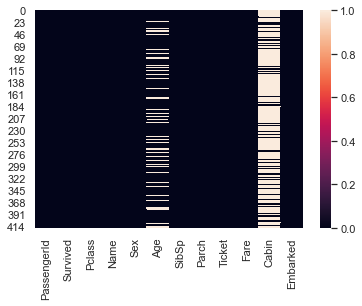

In [14]:
#visualising the null values
sns.heatmap(td.isna())

In [15]:
#percentages of null values in age column
(td['Age'].isna().sum()/len(td['Age']))*100

20.574162679425836

In [16]:
#percentages of null values in cabin column
(td['Cabin'].isna().sum()/len(td['Cabin']))*100

78.22966507177034

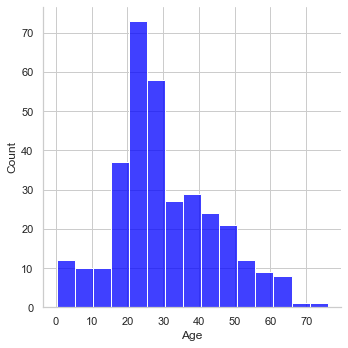

In [17]:
#distribution of the age coulmn
sns.displot(x='Age', data=td)

# Data cleaning

In [18]:
#Filling the missing values
td['Age'].fillna(td['Age'].mean(), inplace=True)

In [19]:
td['Age'].isna().sum() #No nulls in Age column

0

<AxesSubplot:>

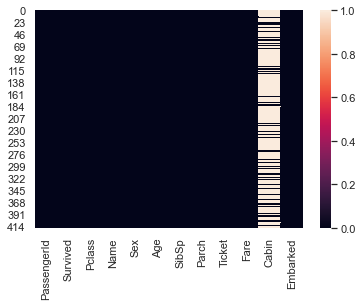

In [20]:
#No more null data exists in Age column visually
sns.heatmap(td.isna())

In [21]:
td.drop('Cabin', axis=1, inplace=True) #dropping the cabin column

In [22]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [23]:
#finding the nulls in row of Fare column for test data results
rows_with_null_fare = td[td['Fare'].isnull()]
print(rows_with_null_fare)

     PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044         0       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Embarked  
152      0   3701   NaN        S  


In [24]:
# Calculate the mean or median of the 'Fare' column
mean_fare = td['Fare'].mean()  # You can also use median() if preferred

# Fill the null values in the 'Fare' column with the calculated mean or median
td['Fare'].fillna(mean_fare, inplace=True)

In [25]:
#checking again if there are any nulls presents
rows_with_null_fare = td[td['Fare'].isnull()]
print(rows_with_null_fare)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked]
Index: []


In [26]:
td.info() #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [27]:
td.dtypes #datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [28]:
gender=pd.get_dummies(td['Sex'], drop_first=True) #creating the dummy values

In [29]:
td['Gender']=gender

In [30]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [31]:
td.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True) #dropping the unneccessary columns for model building

In [32]:
td.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


In [33]:
#spliting the columns into independent and dependent 
x=td[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
y=td['Survived']

In [34]:
x 

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,3,34.50000,0,0,7.8292,1
1,893,3,47.00000,1,0,7.0000,0
2,894,2,62.00000,0,0,9.6875,1
3,895,3,27.00000,0,0,8.6625,1
4,896,3,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,1
414,1306,1,39.00000,0,0,108.9000,0
415,1307,3,38.50000,0,0,7.2500,1
416,1308,3,30.27259,0,0,8.0500,1


In [35]:
x.isna().sum() #identifying whether is any nulls are presented 

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

In [36]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Data modeling

In [37]:
#Building the model using logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [39]:
lr=LogisticRegression()

In [40]:
lr.fit(x_train,y_train) #fit the model

C:\Users\yuvak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#prediction of accuracy
from sklearn.metrics import accuracy_score

# Assuming you have already trained the lr model and made predictions
predictions = lr.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


An accuracy of 1.0 (or 100%) means that the model's predictions perfectly match the true labels in test dataset. In other words, every single prediction made by the model is correct, and there are no errors in classification. This is often referred to as "perfect accuracy."

# TESTING

In [42]:
#importing the confusion matrix
from sklearn.metrics import confusion_matrix

In [43]:
#confusion matrix
pd.DataFrame(confusion_matrix(y_test, predictions),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,92,0
Actual Yes,0,46


This matrix can be interpreted as---

True Negative (TN): 92 instances were correctly predicted as 'No' (non-survivors).
False Positive (FP): 0 instances were incorrectly predicted as 'Yes' (survivors) when the actual class was 'No' (non-survivors).
False Negative (FN): 0 instances were incorrectly predicted as 'No' (non-survivors) when the actual class was 'Yes' (survivors).
True Positive (TP): 46 instances were correctly predicted as 'Yes' (survivors).

In [44]:
#importing classification report
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92
           1       1.00      1.00      1.00        46

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



This classification report indicates that the model's predictions are perfect, with precision, recall, and F1-score all being 1.00 for both classes. However, achieving such high performance should be critically examined for signs of overfitting or other issues, and cross-validation should be used to ensure the model's generalizability.

# Cross validation

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Perform cross-validation for Logistic Regression
scores = cross_val_score(logreg_model, x, y, cv=5, scoring='accuracy')

# Calculate the mean accuracy score
mean_accuracy = scores.mean()

print(f"Logistic Regression - Cross-Validation Accuracy: {mean_accuracy:.4f}")

Logistic Regression - Cross-Validation Accuracy: 1.0000


C:\Users\yuvak\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\yuvak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yuvak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (